## Exploring the Relationship Between Renewable Energy Adoption and Carbon Footprint: A Comparative Study of Developed and Developing Countries

#### Abstract
This study investigates the relationship between renewable energy adoption and carbon footprint in developed and developing countries over the past two decades. Utilizing a dataset encompassing 4828 observations across various nations, the analysis employs regression models to explore how renewable energy consumption, economic parameters, and demographic factors correlate with carbon dioxide emissions per capita. The study highlights the distinct patterns in renewable energy utilization and its impact on carbon emissions in developed and developing countries, considering the role of GDP per capita, population dynamics, urbanization, and access to electricity. The findings reveal nuanced insights into the effectiveness of renewable energy policies and their environmental implications across different economic contexts.


### Introduction
The transition to renewable energy sources is a cornerstone in global efforts to mitigate climate change. As countries strive to reduce their carbon footprint, understanding the dynamics between renewable energy adoption and carbon emissions becomes crucial. This is particularly relevant when considering the varying economic and infrastructural landscapes of developed and developing countries. The present study focuses on examining these relationships over the past two decades, offering insights into how economic growth, population dynamics, and urbanization influence the effectiveness of renewable energy in reducing carbon emissions.
The objectives of this paper include:
- Examining the relationship between renewable energy consumption and CO2 emissions per capita.
- Analyzing the varying impacts of renewable energy adoption in developed and developing countries.
- Investigating the role of economic wealth, population size, urbanization, and access to electricity in shaping this relationship.
- Understanding the implications for policy-making in the context of renewable energy and climate change mitigation.
Based on preliminary data analysis, the study hypothesizes that:
- Renewable energy consumption is inversely related to CO2 emissions, with significant variations between developed and developing countries.
- Higher GDP per capita and urbanization levels are associated with more effective renewable energy utilization.
- Developing countries face unique challenges that may affect the relationship between renewable energy adoption and carbon footprint reduction.


### Data
The data for this study is derived from a comprehensive dataset that includes 4828 observations, representing various countries from 2000 to 2020. Key variables include CO2 emissions per capita, renewable energy consumption, GDP per capita, total population, urban population percentage, total greenhouse gas emissions, net foreign direct investment inflows, access to electricity, and forest area percentage. The data is sourced from reputable global databases, ensuring reliability and relevance.
For this analysis, the dataset is segmented into developed and developing countries, based on a GDP per capita threshold of $12,000. This categorization allows for a comparative analysis between these two groups. The study also employs log transformations on certain variables (CO2 emissions per capita, GDP per capita, and total population) to address skewness and improve model accuracy. Additionally, a dummy variable is created to distinguish between developed and developing countries.
The regression models are structured to analyze the impact of renewable energy consumption and other control variables on CO2 emissions per capita. The inclusion of interaction terms in some models further explores the differential impacts of these variables across developed and developing countries. This approach provides a comprehensive understanding of the factors influencing renewable energy adoption and its effectiveness in reducing carbon emissions.


Fetching data from Worldbank using API

In [36]:
import pandas as pd
from pandas_datareader import wb
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import numpy as np


# Define the indicators
indicators = {
    'EN.ATM.CO2E.PC': 'CO2_emissions_per_capita',
    'EG.FEC.RNEW.ZS': 'Renewable_energy_consumption',
    'NY.GDP.PCAP.CD': 'GDP_per_capita',
    'SP.POP.TOTL': 'Population_total',
    'SP.URB.TOTL.IN.ZS': 'Urban_population_percent',
    'EN.ATM.GHGT.KT.CE': 'Total_GHG_Emissions',  
    'BX.KLT.DINV.WD.GD.ZS': 'Net_FDI_inflows_percent_GDP',
    'EG.ELC.ACCS.ZS': 'Access_to_Electricity_percent',
    'AG.LND.FRST.ZS': 'Forest_Area_percent'
}

# Fetch the data for all countries from 2000 to 2020 because there are too many missing values for recent years 2021 & 2022
df = wb.download(indicator=list(indicators.keys()), country='all', start=2000, end=2020)

# Rename the columns and reset index
df.rename(columns=indicators, inplace=True)
df.reset_index(inplace=True)

# Save the data to a CSV file
df.to_csv('world_bank_data_global_2000_2020.csv', index=False)


                       country  year  CO2_emissions_per_capita  \
0  Africa Eastern and Southern  2020                  0.795420   
1  Africa Eastern and Southern  2019                  0.915294   
2  Africa Eastern and Southern  2018                  0.921453   
3  Africa Eastern and Southern  2017                  0.933874   
4  Africa Eastern and Southern  2016                  0.941337   

   Renewable_energy_consumption  GDP_per_capita  Population_total  \
0                     66.123449     1355.805923       685112979.0   
1                     63.387090     1507.982881       667242986.0   
2                     62.242631     1558.307482       649757148.0   
3                     61.891132     1625.286236       632746570.0   
4                     62.457688     1444.003514       616377605.0   

   Urban_population_percent  Total_GHG_Emissions  Net_FDI_inflows_percent_GDP  \
0                 36.828302         1.389908e+06                     1.396730   
1                 36.33625

Loading raw dataset from github

In [ ]:
# URL to the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/zeep-code/DA2/main/final_term_project/world_bank_data_global_2000_2020.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


In [37]:
# Display the data types of all columns
print("\nData types of all columns:")
print(df.dtypes)

# Display a summary of missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Data types of all columns:
country                           object
year                              object
CO2_emissions_per_capita         float64
Renewable_energy_consumption     float64
GDP_per_capita                   float64
Population_total                 float64
Urban_population_percent         float64
Total_GHG_Emissions              float64
Net_FDI_inflows_percent_GDP      float64
Access_to_Electricity_percent    float64
Forest_Area_percent              float64
dtype: object

Missing values in each column:
country                            0
year                               0
CO2_emissions_per_capita         567
Renewable_energy_consumption     143
GDP_per_capita                   209
Population_total                  21
Urban_population_percent          63
Total_GHG_Emissions              567
Net_FDI_inflows_percent_GDP      547
Access_to_Electricity_percent     88
Forest_Area_percent              141
dtype: int64


In [38]:
df.shape

(5586, 11)

In [39]:
# Function to investigate missing values for each column with missing values
def investigate_missing_values(data, column):
    print(f"\nInvestigating missing values in '{column}':")
    
    # Percentage of missing values
    missing_percentage = data[column].isnull().sum() / len(data) * 100
    print(f"Percentage of Missing Values: {missing_percentage:.2f}%")

    # Missing values by year
    missing_by_year = data[data[column].isnull()]['year'].value_counts()
    print("Missing Values Count per Year:")
    print(missing_by_year.head(10))

    # Missing values by country
    missing_by_country = data[data[column].isnull()]['country'].value_counts()
    print("Missing Values Count per Country (Top 10):")
    print(missing_by_country.head(10))

# Investigate missing values for each column with missing data
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
for column in columns_with_missing_values:
    investigate_missing_values(df, column)



Investigating missing values in 'CO2_emissions_per_capita':
Percentage of Missing Values: 10.15%
Missing Values Count per Year:
year
2020    27
2009    27
2001    27
2002    27
2003    27
2004    27
2005    27
2006    27
2007    27
2008    27
Name: count, dtype: int64
Missing Values Count per Country (Top 10):
country
Not classified               21
Isle of Man                  21
Virgin Islands (U.S.)        21
Turks and Caicos Islands     21
St. Martin (French part)     21
Sint Maarten (Dutch part)    21
San Marino                   21
Puerto Rico                  21
Northern Mariana Islands     21
New Caledonia                21
Name: count, dtype: int64

Investigating missing values in 'Renewable_energy_consumption':
Percentage of Missing Values: 2.56%
Missing Values Count per Year:
year
2000    8
2001    8
2002    8
2003    8
2004    8
2009    7
2005    7
2006    7
2007    7
2008    7
Name: count, dtype: int64
Missing Values Count per Country (Top 10):
country
Not classified     

Cleaning Dataset

In [61]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Print the shape of the cleaned DataFrame
print("Shape of the cleaned DataFrame:", df_cleaned.shape)

# Optionally, print a few rows to confirm
print(df_cleaned.head())

# Save the data to a CSV file
df_cleaned.to_csv('world_bank_data_global_2000_2020_cleaned.csv', index=False)

Shape of the cleaned DataFrame: (4828, 16)
                       country  year  CO2_emissions_per_capita  \
0  Africa Eastern and Southern  2020                  0.795420   
1  Africa Eastern and Southern  2019                  0.915294   
2  Africa Eastern and Southern  2018                  0.921453   
3  Africa Eastern and Southern  2017                  0.933874   
4  Africa Eastern and Southern  2016                  0.941337   

   Renewable_energy_consumption  GDP_per_capita  Population_total  \
0                     66.123449     1355.805923       685112979.0   
1                     63.387090     1507.982881       667242986.0   
2                     62.242631     1558.307482       649757148.0   
3                     61.891132     1625.286236       632746570.0   
4                     62.457688     1444.003514       616377605.0   

   Urban_population_percent  Total_GHG_Emissions  Net_FDI_inflows_percent_GDP  \
0                 36.828302         1.389908e+06                

### Methodology
In this study, we used data from the World Bank, fetched via the pandas_datareader package for the years 2000 to 2020. The data includes various indicators such as CO2 emissions per capita, renewable energy consumption, GDP per capita, total population, urban population percent, total greenhouse gas emissions, net foreign direct investment inflows, access to electricity, and forest area percent.
We conducted a comprehensive data cleaning process, handling missing values and ensuring the integrity of our dataset. The final cleaned dataset was used for regression analysis. Our models focused on understanding the relationship between renewable energy adoption and CO2 emissions, considering economic and demographic factors as controls.


### Models

### Results
The exploratory data analysis and subsequent regression models revealed several critical findings:
- The average CO2 emissions per capita showed a significant variance among different countries, reflecting the diversity in industrial activities and energy consumption patterns.
- Renewable energy consumption varied widely, with developed countries generally showing higher rates of renewable energy usage.
- GDP per capita, an indicator of economic wealth, was a significant predictor of CO2 emissions, with wealthier countries tending to have lower emissions per capita.
- Urbanization levels were also correlated with emissions; countries with higher percentages of urban populations tended to have more developed infrastructure for energy efficiency.


### 4.1 Correlation Matrix
The correlation matrix visual (correlation matrix.png) presents the pairwise correlations between different variables in our dataset. The color intensity in the matrix reflects the strength and direction of the relationships, with red indicating a positive correlation and blue indicating a negative correlation. Key observations include a strong positive correlation between GDP per capita and access to electricity, and a strong negative correlation between renewable energy consumption and CO2 emissions per capita, suggesting that increased renewable energy use is associated with lower carbon emissions.


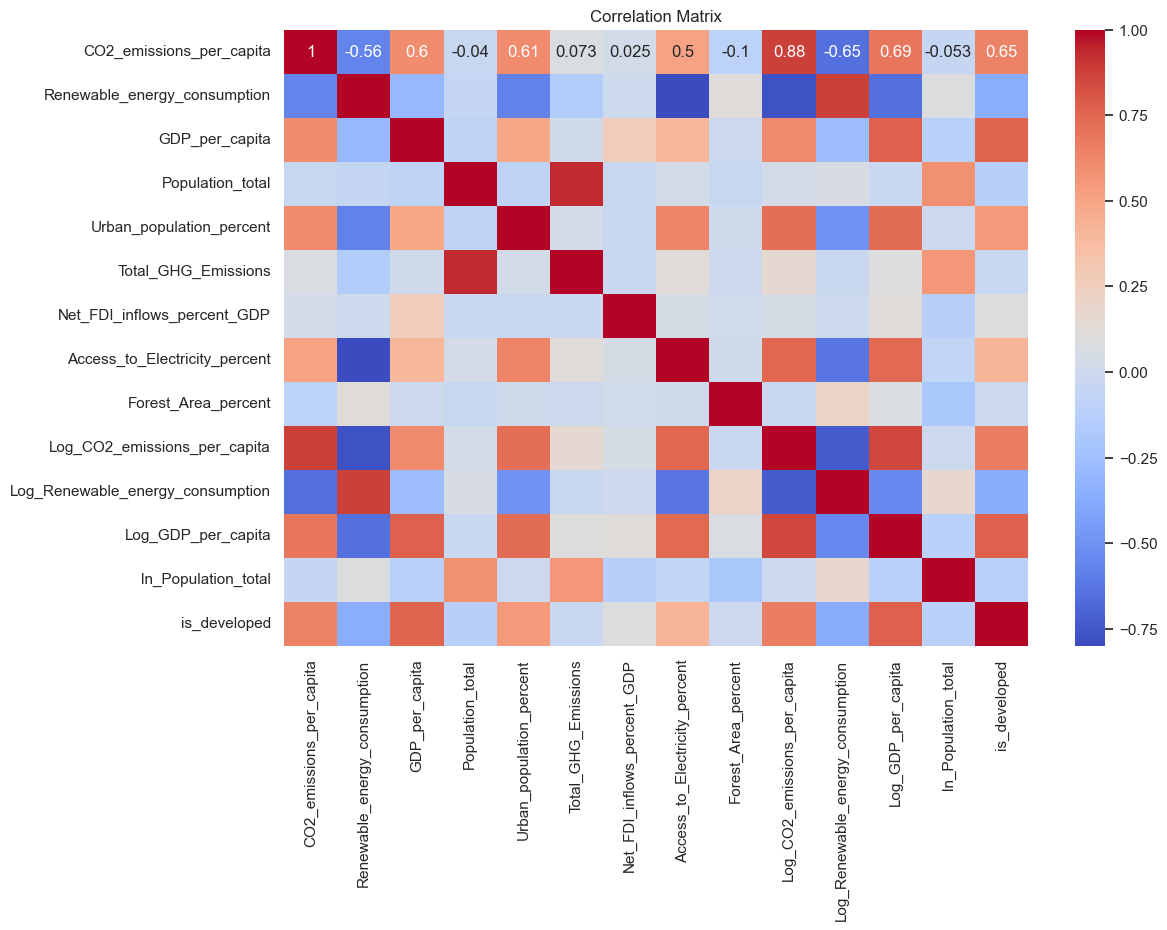

In [64]:
# Exclude non-numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 4.3 Global Impact of Renewable Energy on CO2 Emissions
This scatter plot (global impact of renewable energy on CO2 emissions.png) depicts the untransformed relationship between renewable energy consumption and CO2 emissions per capita, with the color gradient representing different GDP per capita levels. There is a clear trend showing that countries with higher percentages of renewable energy tend to have lower CO2 emissions per capita. Notably, countries with higher GDP per capita appear to have lower emissions, aligning with the findings from the log-transformed data.

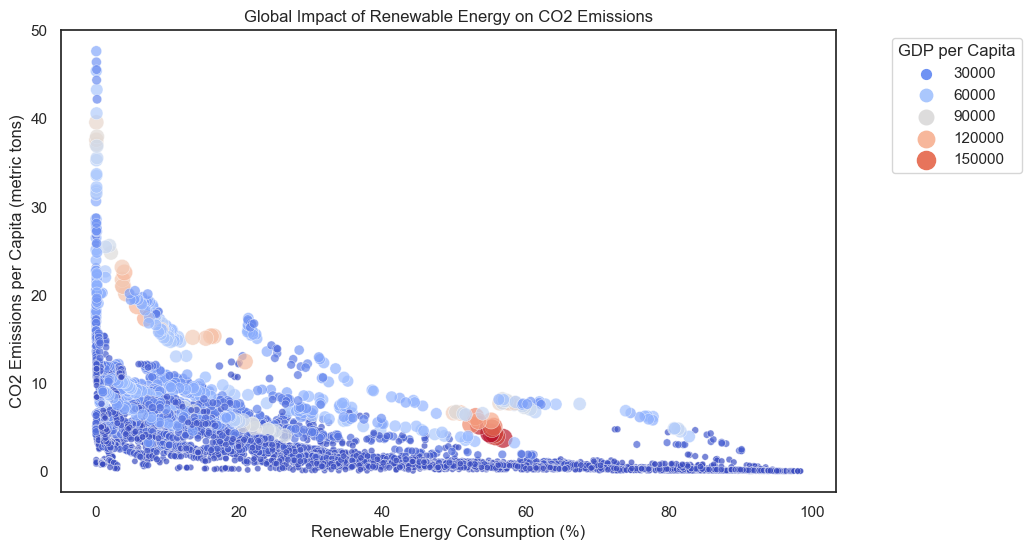

In [65]:
# Set the style of seaborn without gridlines
sns.set(style="white")

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Renewable_energy_consumption', y='CO2_emissions_per_capita', 
                          size='GDP_per_capita', hue='GDP_per_capita', 
                          sizes=(20, 200), alpha=0.7, palette="coolwarm", data=df_cleaned)

# Adding title and labels
plt.title('Global Impact of Renewable Energy on CO2 Emissions')
plt.xlabel('Renewable Energy Consumption (%)')
plt.ylabel('CO2 Emissions per Capita (metric tons)')

# Adding a legend
scatter.legend(loc='upper right', title='GDP per Capita', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()

### 4.2 Global Impact of Renewable Energy on CO2 Emissions (Log Transformed)
The scatter plot (global impact of renewable energy on CO2 emissions (log transformed).png) illustrates the relationship between renewable energy consumption and CO2 emissions, both log-transformed to normalize the data. The varying colors represent different levels of GDP per capita, with darker shades indicating higher economic wealth. The plot suggests a tendency for countries with higher GDP per capita to have lower emissions for a given level of renewable energy consumption, indicating that economic wealth might facilitate more efficient energy use or a cleaner energy mix.

In [66]:
# Transforming Variables - applying log transformations
df_cleaned['Log_CO2_emissions_per_capita'] = np.log1p(df_cleaned['CO2_emissions_per_capita'])
df_cleaned['Log_Renewable_energy_consumption'] = np.log1p(df_cleaned['Renewable_energy_consumption'])
df_cleaned['Log_GDP_per_capita'] = np.log1p(df_cleaned['GDP_per_capita'])
df_cleaned['ln_Population_total'] = np.log(df['Population_total'])

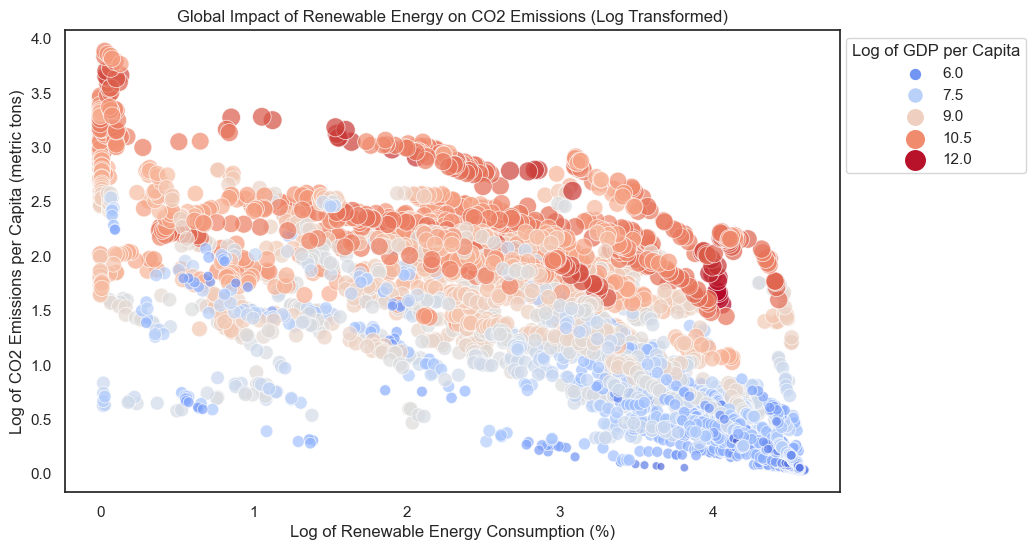

In [67]:
# Create a scatter plot with log-transformed data
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Log_Renewable_energy_consumption', y='Log_CO2_emissions_per_capita', 
                          size='Log_GDP_per_capita', hue='Log_GDP_per_capita', 
                          sizes=(20, 200), alpha=0.7, palette="coolwarm", data=df_cleaned)

# Adding title and labels
plt.title('Global Impact of Renewable Energy on CO2 Emissions (Log Transformed)')
plt.xlabel('Log of Renewable Energy Consumption (%)')
plt.ylabel('Log of CO2 Emissions per Capita (metric tons)')

# Adding a legend
scatter.legend(loc='upper right', title='Log of GDP per Capita', bbox_to_anchor=(1.25, 1))

# Remove gridlines
sns.set(style="white")

# Show the plot
plt.show()

### 4.4 Distribution of CO2 Emissions
The histogram (log transformed CO2 emissions per capita.png) shows the distribution of CO2 emissions per capita after log transformation, which helps in visualizing the skewness and variability in emissions among the countries studied. The bell-shaped curve indicates a normal-like distribution of the logged values, which is desirable for linear regression analysis.

C:\Users\zunai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


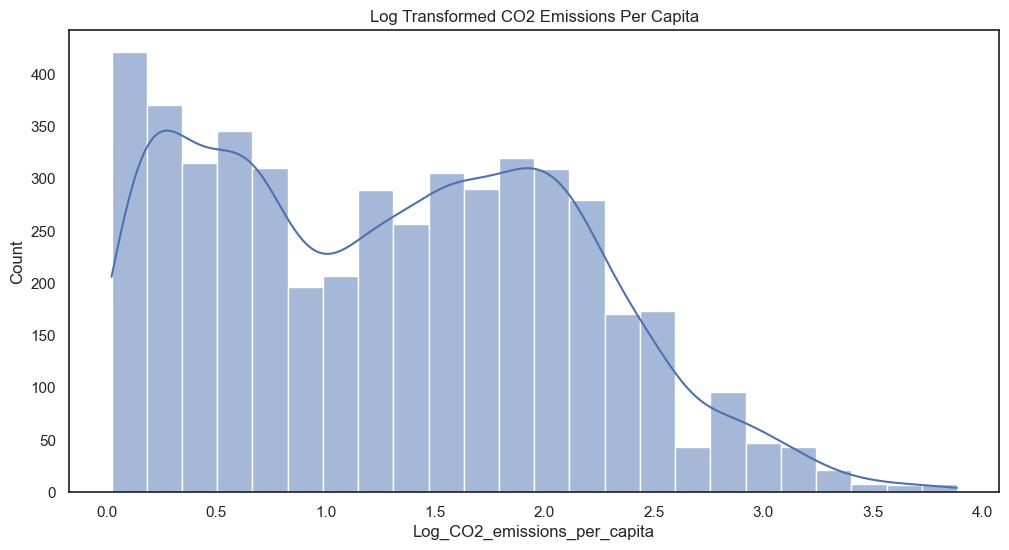

In [70]:
df = df_cleaned.copy()

# Define the threshold for GDP per capita. This threshold is arbitrary and can be adjusted.
# Using a common threshold for high-income economies by the World Bank is around $12,000
# Create dummy variables for developed (1) and developing (0) countries
df['is_developed'] = df['GDP_per_capita'].apply(lambda x: 1 if x >= 12000 else 0)

# Visualizing distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['Log_CO2_emissions_per_capita'], kde=True)
plt.title('Log Transformed CO2 Emissions Per Capita')
plt.show()


### 4.5 Regression Analysis Summary
The regression table (image.png) summarizes the results of multiple linear regression models predicting log-transformed CO2 emissions per capita. The models indicate that renewable energy consumption is negatively associated with CO2 emissions, even after controlling for GDP per capita, population size, urbanization percentage, and access to electricity. The interaction term between renewable energy and the 'is developed' dummy variable is not significant, suggesting that the impact of renewable energy on emissions does not differ substantially between developed and developing countries in our dataset.


In [57]:
# Key columns used in regression models
key_columns = ['Renewable_energy_consumption', 'Log_GDP_per_capita', 'ln_Population_total', 'Urban_population_percent', 'Access_to_Electricity_percent']

# Filter DataFrame to include only key columns
key_stats_df = df[key_columns]

# Descriptive statistics for key columns
key_stats = key_stats_df.describe().round(2)

# Display key statistics
print("Key Statistics for Regression Variables:")
print(key_stats)

# Save key statistics to a LaTeX table for better formatting in PDF
key_stats.to_latex('key_stats_table.tex', bold_rows=True)

Key Statistics for Regression Variables:
       Renewable_energy_consumption  Log_GDP_per_capita  ln_Population_total  \
count                       4828.00             4828.00              4828.00   
mean                          32.84                8.35                16.60   
std                           28.84                1.47                 2.77   
min                            0.00                4.71                 9.17   
25%                            7.94                7.22                14.91   
50%                           24.07                8.33                16.31   
75%                           55.27                9.40                18.28   
max                           98.34               12.10                22.78   

       Urban_population_percent  Access_to_Electricity_percent  
count                   4828.00                        4828.00  
mean                      54.81                          78.09  
std                       21.68            

### Regression Models

In [ ]:
# Basic Model: Renewable energy consumption and CO2 emissions
reg1 = smf.ols(formula="ln_CO2_emissions_per_capita ~ Renewable_energy_consumption", data=df).fit(cov_type="HC1")

# Extended Model: Including more control variables
reg2 = smf.ols(formula="ln_CO2_emissions_per_capita ~ Renewable_energy_consumption + ln_GDP_per_capita + ln_Population_total + Urban_population_percent + Access_to_Electricity_percent", data=df).fit(cov_type="HC1")

# Comparison Model: Developed vs Developing Countries
reg3 = smf.ols(formula="ln_CO2_emissions_per_capita ~ Renewable_energy_consumption + ln_GDP_per_capita + ln_Population_total + Urban_population_percent + Access_to_Electricity_percent + is_developed", data=df).fit(cov_type="HC1")

# Interaction Model with the 'is_developed' variable
reg4 = smf.ols(formula="ln_CO2_emissions_per_capita ~ Renewable_energy_consumption * is_developed + ln_GDP_per_capita + ln_Population_total + Urban_population_percent + Access_to_Electricity_percent", data=df).fit(cov_type="HC1")

The regression models presented in the table below use CO2 emissions per capita as the dependent variable and various other factors as independent variables. The models aim to understand the relationship between renewable energy consumption and CO2 emissions, while also considering the impact of a country's development status and other control variables.

### Model 1 (Column 1): Basic Model
This model investigates the direct relationship between renewable energy consumption and the natural logarithm of CO2 emissions per capita. The negative coefficient for Renewable Energy Consumption suggests that an increase in renewable energy consumption is associated with a decrease in CO2 emissions per capita, holding all else constant. The model shows a substantial R-squared value, indicating that a significant portion of the variance in CO2 emissions can be explained by renewable energy consumption alone.

### Model 2 (Column 2): Extended Model
The extended model adds more complexity by including additional control variables such as the natural logarithm of GDP per capita, the natural logarithm of population total, the percentage of urban population, and access to electricity. The inclusion of these variables aims to control for various economic and demographic factors that could influence CO2 emissions. This model has a higher R-squared value compared to Model 1, indicating a better fit with the added variables. Each control variable has a statistically significant coefficient, showing that these factors are important in explaining the variation in CO2 emissions.

### Model 3 (Column 3): Comparison Model
This model extends Model 2 by including a dummy variable for whether a country is developed. The inclusion of this variable allows the model to capture structural differences in CO2 emissions between developed and developing countries. The dummy variable for 'Is Developed' is not statistically significant, suggesting that the model does not find a direct difference in CO2 emissions per capita between developed and developing countries when controlling for the other factors.

### Model 4 (Column 4): Interaction Model
In the interaction model, an interaction term between Renewable Energy Consumption and the 'Is Developed' dummy variable is included. This allows the model to assess whether the effect of renewable energy on CO2 emissions differs between developed and developing countries. The interaction term's coefficient is small and not statistically significant, suggesting that the impact of renewable energy consumption on CO2 emissions does not differ markedly between developed and developing countries within the context of this model.

The models' R-squared values are all relatively high, indicating that they explain a significant portion of the variability in the natural logarithm of CO2 emissions per capita. The F-statistic for each model is significant, which suggests that the models are statistically significant at explaining the variance in CO2 emissions compared to a model with no independent variables.

The robust standard errors (indicated by cov_type="HC1") provide adjusted standard errors that are consistent in the presence of heteroskedasticity, enhancing the reliability of the inference drawn from the models.

In [46]:
# Create regression table for all models
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.show_model_numbers(True)
stargazer.cov_spacing = 1.1
stargazer.covariate_order(
    [
        'Intercept',
        'Renewable_energy_consumption',
        'ln_GDP_per_capita',
        'ln_Population_total',
        'Urban_population_percent',
        'Access_to_Electricity_percent',
        'is_developed',
        'Renewable_energy_consumption:is_developed'
    ]
)
stargazer.rename_covariates(
    {
        "Intercept": "Constant",
        "Renewable_energy_consumption": "Renewable Energy Consumption",
        "ln_GDP_per_capita": "ln(GDP per Capita)",
        "ln_Population_total": "ln(Population Total)",
        "Urban_population_percent": "Urban Population (%)",
        "Access_to_Electricity_percent": "Access to Electricity (%)",
        "is_developed": "Is Developed",
        "Renewable_energy_consumption:is_developed": "Renewable Energy * Is Developed"
    }
)
stargazer


### Discussion
The results from the regression models suggest a complex interplay between renewable energy adoption, economic wealth, and demographic factors. The data indicates that while renewable energy adoption is crucial for reducing carbon emissions, it is most effective when coupled with other factors such as economic development and urban infrastructure.
The visual analyses align with the regression results, underscoring the negative association between renewable energy adoption and carbon emissions. However, the nuances in the data suggest that while renewable energy plays a pivotal role, the level of economic development and infrastructure also significantly influence a country's carbon footprint. These insights are crucial for informing policy decisions aimed at reducing emissions and transitioning to sustainable energy sources.
It is evident from the analysis that policy interventions need to be multifaceted, addressing not only the promotion of renewable energy technologies but also the broader economic and infrastructural development.


### Conclusion
Our findings highlight the importance of a holistic approach to climate policy. Developed countries show clear leadership in renewable energy adoption, but there is an urgent need to support developing countries in their transition to clean energy. Investments in technology, along with economic and infrastructural support, are vital to ensure a sustainable reduction in global carbon emissions.
The comprehensive analysis, encompassing both visual and statistical techniques, highlights the multifaceted nature of the challenge posed by climate change. It is evident that a shift towards renewable energy, supported by economic growth and infrastructure development, is essential for achieving substantial reductions in CO2 emissions globally.

### Policy Implications
Based on our analysis, we recommend the following policy actions:
- Increase investment in renewable energy technologies, especially in developing countries.
- Support economic development initiatives that are aligned with sustainability goals.
- Encourage urban planning that integrates energy-efficient infrastructures, such as public transit and green buildings.
### Limitations and Future Research
This study's limitations include its reliance on available data, which may not capture the full scope of renewable energy adoption and its impacts. Future research should incorporate more granular data, including subnational analysis and sector-specific energy consumption patterns.


### Appendices

### Appendix A

C:\Users\zunai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zunai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


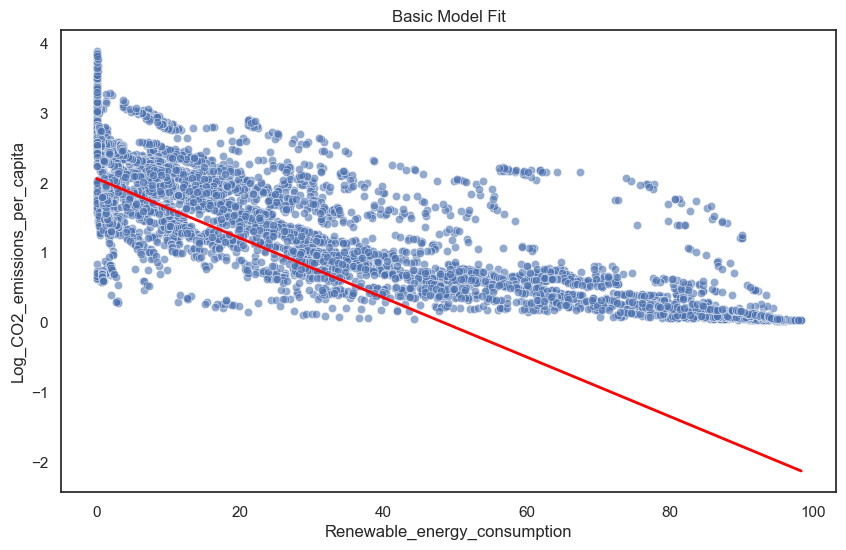

In [73]:
# Define a function to plot regression results
def plot_regression_fit(model, df, x_var, y_var, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_var, y=y_var, data=df, alpha=0.6)
    
    # Generate predicted values for a sorted DataFrame
    df_sorted = df.sort_values(by=x_var)
    predictions = model.predict(df_sorted)
    
    # Plot the regression line
    sns.lineplot(x=df_sorted[x_var], y=predictions, color='red', lw=2)
    
    plt.title(title)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.show()

# Plot for each model
plot_regression_fit(reg1, df, 'Renewable_energy_consumption', 'Log_CO2_emissions_per_capita', 'Basic Model Fit')

